---
# TP1 Bilinéaire : Synthèse de filtres à partir du continu
---

Vous avez en [TD synthétisé un filtre du premier ordre](../td/SYNTH.ipynb) discret avec la méthode bilinéaire.

On va vérifier les calculs en numérique cette fois-ci.


## 1 - Vérification du calcul analytique
---
Dans le [travail préparatoire](../FILT_prepa_tp1.ipynb) vous avez pu trouver l'expression analytique de la fonction de transfert du filtre et de la récurrence.

Une étudiante distraite a trouvé :

$$ G(z) = K \frac{Te + z^{-1}}{(Te+\tau).z^{-1} + (Te-2.\tau)}$$

**Vérifiez pour cette formule et la votre** 
  - homogénéïté 
  - Gain statique = celui de $\frac{K}{1+\tau.p}$ = K
  - Gain HF = celui du premier ordre passe-bas = 0


Passez à la recurrence du filtre discret et identifiez à la forme :

$$
\overbrace{a_1}^{=1} . y[k+1]  =  - a_0 .y[k] + b_1. x[k+1] + b_0. x[k] 
$$

**Vérifiez pour cette récurrence avec vos valeurs des coefs.**
  - homogénéïté de vos coefficients $a_0,b_1,$ etc.
  - gain statique avec $x[k+1]=x[k]=e^{i.\overbrace{\omega}^{=0}.k.T_e}=x^\star=1$ et $y[k+1]=y[k]=y^\star.e^{i.\overbrace{\omega}^{=0}.k.T_e}=y^\star$  
    on doit avoir $\frac{y^\star}{x^\star}=K$
  - gain HF avec $x[k]=e^{i2\pi.\overbrace{f}^{=\frac{F_e}{2}}.k.T_e}=x^\star.(-1) ^k$ et $y[k]=(-1) ^k.y^\star$  
    on doit avoir $\frac{y^\star}{x^\star}=0$ le gain HF d'un passe-bas
    
Cette récurrence donne une représentation de $G_d$ qui est compatible Matlab/octave :  

$G_d(z) = \frac{ b_1 z + b_0}{ a_1 z + a_0}$ avec $a_1=1$

### Script de calcul des coefs

Corrigez les nombreuses erreurs du code ci-dessous. 

On veut un premier ordre tel que :
  - gain statique =1 ;
  - fréquence de coupure $f_c=\frac{F_e}{4}\equiv\tilde{f_c}=1/4$ ;
  - effet passe-bas ;
  - fréquence d'échantillonnage audio de 48kHz.
 

In [1]:
clear all; close all; clc;
%% ADAPTER et CORRIGER les 666
%% Paramètres du filtre discret imposés
Fe = 666;      % Fréquence d'échantillonnage [Hz]
Te = 666;      % Période d'échantillonnage   [s] 

%% Parametres du filtre continu imposé
K = 666;
Fc = Fe/4;


%% MODIFIEZ avec vos formules les paramètres de récurrence
% du genre  Tau = 1/fc, 
%  a0 = Te-2*tau/Te
%  etc.
wc = 666;
tau = 666;

b0 = 666 ;
b1 = 666 ; 
a0 = 666; 
a1 = 666; 

%% Vérifiez vos gain statiques et HF
% MODIFIEZ
gain_statique = (a0+a1)/(b0+b1) * 666 
gain_hf = (a0-a1)/(b0-b1)/666

gain_statique =  666
gain_hf = NaN


#### Corrigé

In [2]:
clear all; close all; clc;
%% ADAPTER et CORRIGER les 666
%% Paramètres du filtre discret imposés
Fe = 48e3;      % Fréquence d'échantillonnage [Hz]
Te = 1/Fe;      % Période d'échantillonnage   [s] 

%% Parametres du filtre continu imposé
K = 1;
Fc = Fe/4;


%% MODIFIEZ avec vos formules les paramètres de récurrence
% du genre  Tau = 1/fc, 
%  a0 = Te-2*tau/Te
%  etc.
wc = 2*pi*Fc;
tau = 1/wc;

b0 = K*Te ;
b1 = K*Te ; 
a0 = Te-2*tau; 
a1 = Te+2*tau; 

%% Vérifiez vos gain statiques et HF
% MODIFIEZ
gain_statique = (b0+b1)/(a0+a1) 
gain_hf = (b0-b1)/(a0-a1)

gain_statique =  1
gain_hf = -0


### 2 Vérifier le G(p)

On peut créer une **fonction anonyme** capable d'évaluer la fonction de transfert pour une valeur de z donnée.

Par exemple `f = @(x,a) 3+x^2*a;` définit en une ligne la fonction $f: (x, a) \mapsto 2+ a\,x^2$ ce qui pourrait être fait de manière équivalente par
```octave
function val = f(x,a)
    val = 2 + a * x^2
end
```

On définit $G(p)$ et on calcule ensuite avec cette fonction le gain statique et le gain HF et le gain pour $f_c$ :

In [3]:
% On définit la fonction de transfert (où p peut être un vecteur complexe)
% Laissez l'erreur pour voir si on détecte
G= @(p) tau*K./(1-tau*p) ;

%% On vérifie avec le Gain statique
gain_statique = G(0)  % équivalent de p = j.w --> 0 en statique
%% Gain Hautes fréquences
gain_Hf = G(j*inf)   % équivalent de p = j.w --> +j.oo en HF

%% On vérrifie G(j.wc) = K/(1+i)  <-> f=Fe/4=fc
gain_Fe_sur_4 = G(j*wc)
if abs(G(j*2*pi*Fe/4)-(1/(1+i)))<1e-10
    disp("Vous semblez avoir corrigé l'erreur");
else
    disp("Il est possible qu'il y ait une erreur...");
end

gain_statique =    1.3263e-05
gain_Hf = -0
gain_Fe_sur_4 =  6.6315e-06 + 6.6315e-06i
Il est possible qu'il y ait une erreur...


#### Corrigé

Le gain $\tau.K$ fait que G est homogène à du temps !  On doit avoir un ratio entre deux signaux en volts qui doit être sans dimension.  
Le gain statique n'est pas K mais $K\tau$...

La phase n'est pas -45 degrés mais +45 degrés : on a $\frac{K}{1-i}$ et pas $\frac{K}{1+i}$ : erreur de signe.

$\frac{K}{1+i} = K \frac{1-i}{(1+i)(1-i)}=\frac{K}{2} (1-i)$

In [4]:
% On définit la fonction de transfert (où p peut être un vecteur complexe)
% Laissez l'erreur pour voir si on détecte
G= @(p) K./(1+tau*p) ;

%% On vérifie avec le Gain statique
gain_statique = G(0)  % équivalent de p = j.w --> 0 en statique
%% Gain Hautes fréquences
gain_Hf = G(j*inf)   % équivalent de p = j.w --> +j.oo en HF

%% On vérrifie G(j.wc) <-> f=Fe/4=fc
gain_Fe_sur_4 = G(j*wc)
if abs(G(j*2*pi*Fe/4)-(1/(1+i)))<1e-10
    disp("Vous semblez avoir corrigé l'erreur");
else
    disp("Il est possible qu'il y ait une erreur...");
end

gain_statique =  1
gain_Hf = 0
gain_Fe_sur_4 =  0.50000 - 0.50000i
Vous semblez avoir corrigé l'erreur


### Réponse harmonique de G(p)

Inutile d'utiliser de boîte à outils pour tracer une réponse harmonique !

On déclare un vecteur des fréquences $f$ et on fait les calculs de $G(p=j2\pi.f)$ et on trace module et argument ! 

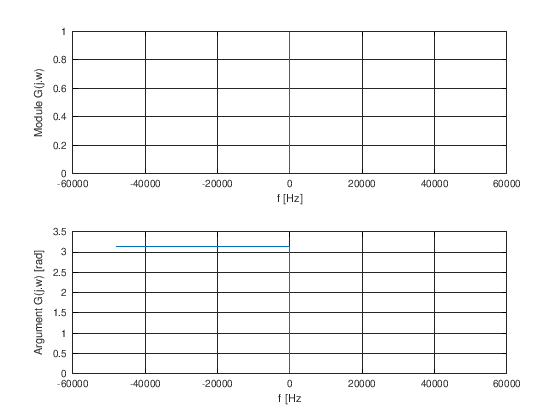

In [5]:
Df=5; 
f = -Fe:Df:Fe ;  % vecteur des fréquences [Hz]
w = 666*f;       % vecteur des pulsation en radians par secondes
p = 666*w;       % vecteur complexes des équivalents harmoniques de p 

G_de_p = G(p) ;   % On calcule pour chaque fréquences G(p=j.w)

% On affiche en linéaire module et argument 
subplot(211);
plot(f, abs(G_de_p)); grid on;
xlabel("f [Hz]");
ylabel("Module G(j.w)")
subplot(212);
plot(f, angle(G_de_p)); grid on;
xlabel("f [Hz")
ylabel("Argument G(j.w) [rad]")


**Corrigé** dans la version bode du code qui suit

### Bode de G(p)

On peut passer l'affichage des fréquences en échelle log en remplaçant `plot` par `semilogx`.

On peut afficher le module en dB avec le log en base 10 `log10`

Attention pas de fréquence négative ni de fréquence nulle ....

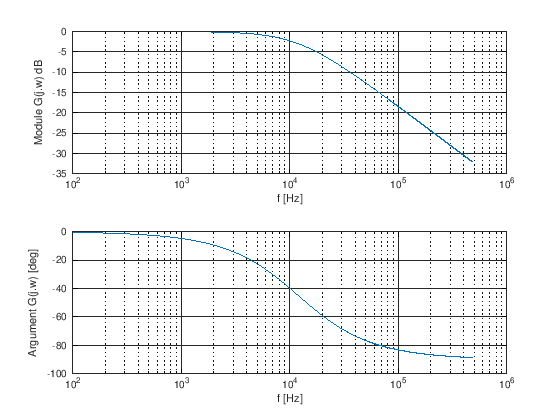

In [6]:
Df=100; 
f = Df:Df:10*Fe ;  % vecteur que des positif >0
w = 2*pi*f;       % vecteur des pulsation en radians par secondes
p = j*w;          % vecteur complexes des équivalents harmoniques de p 

G_de_p = G(p) ;   % On calcule pour chaque fréquences G(p=j.w)

% On affiche en linéaire module et argument 
subplot(211);
semilogx(f, 20*log10(abs(G_de_p))); grid on;
xlabel("f [Hz]");
ylabel("Module G(j.w) dB")
subplot(212);
semilogx(f, angle(G_de_p)/pi*180); grid on;
xlabel("f [Hz]")
ylabel("Argument G(j.w) [deg]")

En payant 5k€ on peut utiliser la control toolbox de Matlab et utiliser la fonction bode...

## 3 Vérifier le Gd(z)

On fait pareil avec l'équivalent harmonique de Gd(z).

In [7]:
%% CORRIGEZ l'étourderie dans ce qui suit
% On définit la fonction de transfert (où z peut être vecteur)
Gd = @(z) (b0 + b1 .* z.^(-1) ) ./ (a0 + a1*z.^(-1) ) ;
% Indice pour l'erreur : convention Matlab !

%% On vérifie avec le Gain statique
gain_statique = Gd(666)
%% Gain Hautes fréquences
gain_Hf = Gd(666)


gain_statique = -3.7117
gain_Hf = -3.7117


### Corrigé


In [8]:
%% CORRIGÉ 
% On définit la fonction de transfert (où z peut être vecteur)
Gd = @(z) (b0 + b1 .* z ) ./ (a0 + a1*z ) ;

%% On vérifie avec le Gain statique
gain_statique = Gd(1)
%% Gain Hautes fréquences
gain_Hf = Gd(-1)

gain_statique =  1
gain_Hf = -0


### Réponse harmonique de Gd(z)

Inutile d'utiliser de boîte à outils pour tracer une réponse harmonique !

On déclare un vecteur des fréquences $f$ et on fait les calculs de $G(z=e^{j2\pi.f.T_e})$ et on trace module et argument ! 

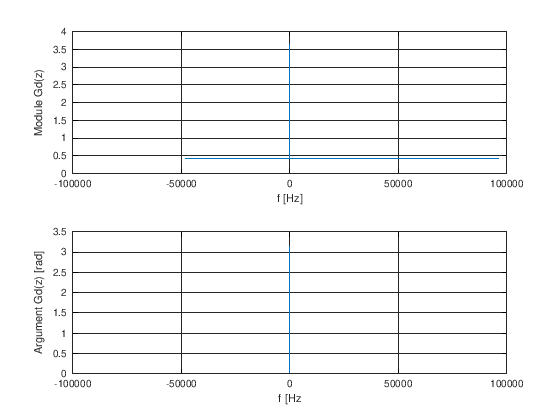

In [9]:
Df=5; 
f = -Fe:Df:2*Fe ;  % vecteur des fréquences [Hz]
w = 666*f;       % vecteur des pulsation en radians par secondes
p = 666*w;       % vecteur complexe des équivalents harmoniques de p 
z = 666*p;       % vecteur complexe des équivalents harmoniques de z 
G_de_z = Gd(z) ;   % On calcule pour chaque fréquences G(p=j.w)

% On affiche en linéaire module et argument 
subplot(211);
plot(f, abs(G_de_z)); grid on;
xlabel("f [Hz]");
ylabel("Module Gd(z)")
subplot(212);
plot(f, angle(G_de_z)); grid on;
xlabel("f [Hz")
ylabel("Argument Gd(z) [rad]")


**Corrigé** dans la version bode du code qui suit

### Bode de Gd(z)

On peut passer l'affichage des fréquences en échelle log en remplaçant `plot` par `semilogx`.

On peut afficher le module en dB avec le log en base 10 `log10`

Attention pas de fréquence négative ni de fréquence nulle ....

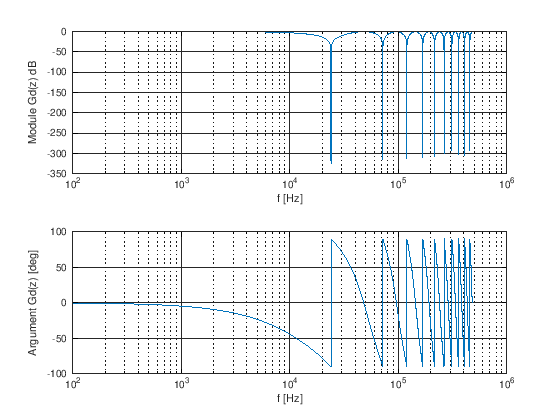

In [10]:
Df=100; 
f = Df:Df:10*Fe ;  % vecteur que des positif >0
w = 2*pi*f;       % vecteur des pulsation en radians par secondes
p = j*w;          % vecteur complexes des équivalents harmoniques de p 
z = exp(Te*p);   % Avec le théorème du retard pour z.

G_de_z = Gd(z) ;   % On calcule pour chaque fréquences G(p=j.w)

% On affiche en linéaire module et argument 
subplot(211);
semilogx(f, 20*log10(abs(G_de_z))); grid on;
xlabel("f [Hz]");
ylabel("Module Gd(z) dB")
subplot(212);
semilogx(f, angle(G_de_z)/pi*180); grid on;
xlabel("f [Hz]")
ylabel("Argument Gd(z) [deg]")

La périodicité tout les $F_e$ est compressée par l'échelle log des fréquences.

À $\frac{F_e}{2}$ et ses périodiques, le gain est nul ce qui donne une atténuation de $- \infty$ en dB.

## 4 - Problème de la compression 
---

Si l'on superpose les courbes continues et discretes on voit un problème pour $f=f_c$


gain_continu_fc =  0.50000 - 0.50000i
gain_discret_fc =  0.38151 - 0.48576i


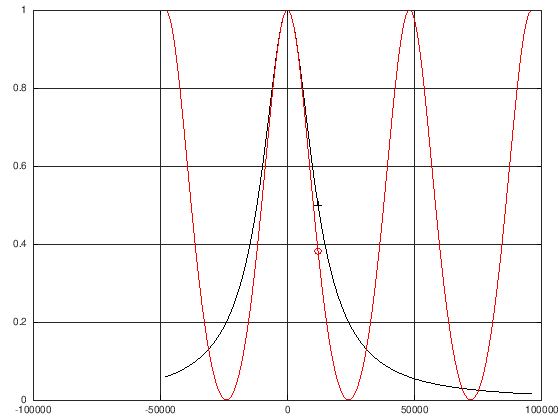

In [11]:
Df = Fe/100;        % résolution fréquentielle d'affichage
f = -Fe: Df: 2*Fe ; % vecteur des fréqeunces [Hz]
p = j*2*pi*f;        % équivalents harmoniques de p
z = exp(Te*p);  % équivalents harmoniques de z

% utilisez la fonction anonyme Gd qui prend l'équivalent de z en argument
% pour calculer la fonction de transfert pour chaques fréquences
G_continu = G(p);
G_discret = Gd(z);


plot(f,G_continu,'k');hold on;
plot(f,G_discret,'r');grid on;

fc=Fe/4;
gain_continu_fc = G(j*2*pi*fc)
gain_discret_fc = Gd(exp(j*2*pi*fc*Te))
plot(fc,gain_continu_fc,'k+');
plot(fc,gain_discret_fc,'ro');



Vous devez constater que :
 - le spectre discret est périodique
 - les fréquences de résonnance ne collent pas !
 
C'est l'effet de la fameuse compression des fréquences ("frequency wrapping") induites par la méthode de la transformation bilinéaire. 

Faites un vrai **tracé de bode** en changeant les fréquences de calcul, car l'échelle log sur l'axe des fréquences ne permet pas d'afficher les fréquences négatives ou nulles : On peut prendre des **fréquences de 100Hz à 10 kHz** par exemple.

On utilise `semilogx` à la place de plot pour avoir les abscisses en échelle log.
On peut caluler le gain en dB avec une fonction anonyme `dB_de`.



gain_continu_fc =  0.50000 - 0.50000i
gain_discret_fc =  0.38151 - 0.48576i


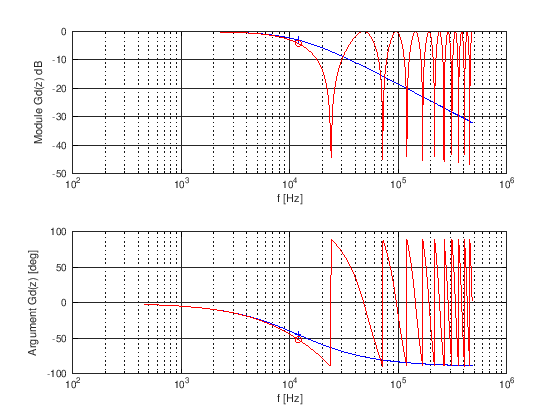

In [13]:
Df=455; 
f = Df:Df:10*Fe ;  % vecteur que des positif >0
w = 2*pi*f;       % vecteur des pulsation en radians par secondes
p = j*w;          % vecteur complexes des équivalents harmoniques de p 
z = exp(Te*p);   % Avec le théorème du retard pour z.
G_continu = G(p);
G_discret = Gd(z);

fc=Fe/4;
gain_continu_fc = G(j*2*pi*fc)
gain_discret_fc = Gd(exp(j*2*pi*fc*Te))


% On affiche en linéaire module et argument 
subplot(211);
semilogx(f, 20*log10(abs(G_continu)),'b'); hold on;
semilogx(f, 20*log10(abs(G_discret)),'r');grid on;
semilogx(fc, 20*log10(gain_continu_fc),'b+'); 
semilogx(fc, 20*log10(gain_discret_fc),'ro'); 
xlabel("f [Hz]");
ylabel("Module Gd(z) dB")
subplot(212);
semilogx(f, angle(G_continu)/pi*180,'b'); hold on;
semilogx(fc, angle(gain_continu_fc)/pi*180,'b+'); 
semilogx(f, angle(G_discret)/pi*180,'r'); grid on;
semilogx(fc, angle(gain_discret_fc)/pi*180,'ro'); 
xlabel("f [Hz]")
ylabel("Argument Gd(z) [deg]")

### 5- Compression fréquencielle 

Regardez la [suite de la vidéo](https://youtu.be/uBZOh7vhjHU?t=587) sur l'effet de compression de la méthode bilinéaire.

Dans la transformation $p \approx s(z)= \frac{2}{Te}\frac{z-1}{z+1}$ utilisée, l'équivalent fréquentiel de $s(z)$ est 

$$ s\left(z\equiv e^{j\omega.T_e}\right)= j.\underbrace{\frac{2}{T_e} \tan\left(\frac{T_e}{2}\omega\right)}_{\omega_d} = j \omega_d$$

On pensait avoir :  
$G_d(\omega) = G_d(z\equiv e^{i\omega\,T_e}) = G(s(z)\equiv j\omega) = G(j\omega)$ qui fait le job pour $f_c$ avec  
$G_d(\omega_c) \approx  G(j\omega_c) = \frac{K}{1+i}$

Mais on a quand $f$ est trop proche de $\frac{F_e}{2}$ :   
$G_d(\omega) = G_d(z\equiv e^{i\omega\,T_e}) = G\left(s(z)\equiv \underbrace{\frac{2}{T_e} \tan\left(\frac{T_e}{2}\omega\right)}_{\omega_d}\right) = G(j\omega_d)$ qui fait **pas** le job pour $f_c$ car  
$G_d(\omega_c) =  G(j\omega_d) \neq \frac{K}{1+i}$


Ainsi, si le polynome $G(p)$ a une fréquence de coupure pour $\omega_c$ en continu ce n'est pas le cas pour le discret car $G_d(\omega_c) = G(\omega_d)$ 

L'astuce est de tricher...

### 6- Compensation fréquentielle 

Il suffit de changer de $G(p)$ pour avoir un filtre passe-bas de gain K mais de **pulsation de cassure $\omega_d$** au lieu de $\omega_c$ qui correspond à $f_c=\frac{Fe}{4}$ ici.


Ainsi on aura $G(p=j\omega_d)=\frac{K}{1+i}$ avec les mêmes gains staiques et HF.

Le passage en z donnera :
$G_d(\omega_c)=G(s(z)\equiv j\omega_d)=G(j\omega_d)=\frac{K}{1=i}$ qui fait le job pour $f_c$ !

Reprenez vos calcul de coefficients mais changez le $\tau$ pour effectuer le prewarp.



In [14]:
clear all; close all; clc;
Fe = 48e3;      % Fréquence d'échantillonnage [Hz]
Te = 1/Fe;      % Période d'échantillonnage   [s] 

%% Parametres du filtre continu imposé
K = 1;
Fc = Fe/4;


%% MODIFIEZ pour avoir un prewarp et un cassure à wd
wc = 2*pi*Fc;
tau = 1/wc;

b0 = K*Te ;
b1 = K*Te ; 
a0 = Te-2*tau; 
a1 = Te+2*tau; 


Gd = @(z) (b0 + b1 .* z ) ./ (a0 + a1*z ) ;
S = @(z) (2/Te*(z-1)./(z+1));
G = @(p) K./(1+tau*p) ;

%% On vérifie avec le Gain statique
gain_statique = Gd(1)
gain_statique_compo = G(S(1))
%% Gain Hautes fréquences
gain_Hf = Gd(-1)
gain_Hf_compo = G(S(-1))
%% gain fc
zc = exp(i*2*pi*Fc*Te);
gain_fc = Gd(zc)
gain_fc_compo = G(S(zc))

if abs(gain_fc - K/(1+i))>0.001 
    printf("\n\nPas de bon prewarp ! On veut 0.5 - 0.5 i = K/(1+i) comme gain...")
else
    printf("\n\nTu es sur la bonne voie jeune padawan")
end


gain_statique =  1
gain_statique_compo =  1
gain_Hf = -0
    @<anonymous> at line 1 column 21
gain_Hf_compo = -0
gain_fc =  0.38151 - 0.48576i
gain_fc_compo =  0.38151 - 0.48576i


Pas de bon prewarp ! On veut 0.5 - 0.5 i = K/(1+i) comme gain...

### Corrigé

In [15]:
clear all; close all; clc;
Fe = 48e3;      % Fréquence d'échantillonnage [Hz]
Te = 1/Fe;      % Période d'échantillonnage   [s] 

%% Parametres du filtre continu imposé
K = 1;
Fc = Fe/4;


%% MODIFIEZ pour avoir un prewarp et un cassure à wd
wc = 2*pi*Fc;
wd = 2/Te*tan(wc*Te/2);
tau = 1/wd; % Oui on met s un tau qui casse pour wd

b0 = K*Te ;
b1 = K*Te ; 
a0 = Te-2*tau; 
a1 = Te+2*tau; 


Gd = @(z) (b0 + b1 .* z ) ./ (a0 + a1*z ) ;
S = @(z) (2/Te*(z-1)./(z+1));
G = @(p) K./(1+tau*p) ;

%% On vérifie avec le Gain statique
gain_statique = Gd(1)
gain_statique_compo = G(S(1))
%% Gain Hautes fréquences
gain_Hf = Gd(-1)
gain_Hf_compo = G(S(-1))
%% gain fc
zc = exp(i*2*pi*Fc*Te);
gain_fc = Gd(zc)
gain_fc_compo = G(S(zc))

if abs(gain_fc - K/(1+i))>1e-9
    printf("\n\nPas de bon prewarp ! On veut 0.5 - 0.5 i = K/(1+i) comme gain...")
else
    printf("\n\nTu es sur la bonne voie jeune padawan")
end


gain_statique =  1.00000
gain_statique_compo =  1
gain_Hf = -0
    @<anonymous> at line 1 column 21
gain_Hf_compo = -0
gain_fc =  0.50000 - 0.50000i
gain_fc_compo =  0.50000 - 0.50000i


Tu es sur la bonne voie jeune padawan

Si on retrace le Bode cela donne

gain_continu_fc =  0.50000 - 0.50000i
gain_discret_fc =  0.50000 - 0.50000i


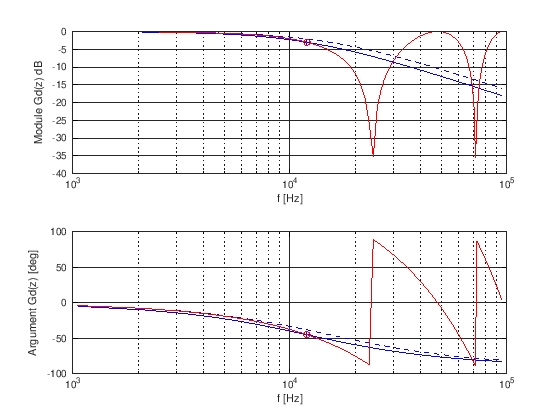

In [106]:
Df=1055; 
f = Df:Df:2*Fe ;  % vecteur que des positif >0
w = 2*pi*f;       % vecteur des pulsation en radians par secondes
p = j*w;          % vecteur complexes des équivalents harmoniques de p 
z = exp(Te*p);   % Avec le théorème du retard pour z.

G = @(p) K./(1+p/wc) ;
Gpre = @(p) K./(1+p/wd) ;

G_continu = G(p);
G_continu_pre = Gpre(p);
G_discret = Gd(z);

fc=Fe/4;

gain_continu_fc = G(j*2*pi*fc)
gain_discret_fc = Gd(exp(j*2*pi*fc*Te))


% On affiche en linéaire module et argument 
subplot(211);
semilogx(f, 20*log10(abs(G_continu)),'b'); hold on;
semilogx(f, 20*log10(abs(G_continu_pre)),'b--'); hold on;
semilogx(f, 20*log10(abs(G_discret)),'r');grid on;
semilogx(fc, 20*log10(gain_continu_fc),'b+'); 
semilogx(fc, 20*log10(gain_discret_fc),'ro'); 
xlabel("f [Hz]");
ylabel("Module Gd(z) dB")
subplot(212);
semilogx(f, angle(G_continu)/pi*180,'b'); hold on;
semilogx(f, angle(G_continu_pre)/pi*180,'b--'); hold on;
semilogx(fc, angle(gain_continu_fc)/pi*180,'b+'); 
semilogx(f, angle(G_discret)/pi*180,'r'); grid on;
semilogx(fc, angle(gain_discret_fc)/pi*180,'ro'); 
xlabel("f [Hz]")
ylabel("Argument Gd(z) [deg]")

## 3 - Application : Ré-échantillonnage
---

**Exportez votre code dans un fichier .m** pour cela faites 

`File -> Save and export Notebooks as .. -> Executable script`

Vous pouvez passer sous windows avec Matlab et aller dans `U:/signal_discret/tp/resample/sail_away.m`. 

Normalement le fichier .m est dans le répertoire `Download` de firefox.  
Au pire prenez le `TP_bilineaire_ordre1.m`qui est dans ce répertoire `U:/signal_discret/tp/resample/`

Vous pouvez rester sur linux et lancer octave dans un terminal "CTRL+ALT+T"


        cd ~/signal_discret/tp/resample
        octave --force-gui



Ecoutez le fichier `sail_away.wav` qui est à Fe=96KHz.

On aimerait le faire passer à Fe=8 kHz par décimation.
 - 1 - Ouvrez le fichier `sail_away.m`, faites la décimation et écoutez le `out.wav`
 - 2 - Modifez le fichier pour afficher les fft avant et après décimation
 - 3 - faites le filtrage qui va bien !
